In [94]:
%matplotlib notebook

from sklearn.linear_model import LinearRegression

# Partir el dataset
from sklearn.model_selection import train_test_split

# Realizar Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as mse

# Para plottear en 3-D
from mpl_toolkits.mplot3d import Axes3D

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

# Link datasets
# https://archive.ics.uci.edu/ml/index.php



In [62]:
from sklearn.datasets import load_boston

# Cargando datos
boston = load_boston()

In [63]:
type(boston)

sklearn.utils.Bunch

In [64]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [65]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Arguments:
        data       : A 2D numpy array of shape (N,M)
        row_labels : A list or array of length N with the labels
                     for the rows
        col_labels : A list or array of length M with the labels
                     for the columns
    Optional arguments:
        ax         : A matplotlib.axes.Axes instance to which the heatmap
                     is plotted. If not provided, use current axes or
                     create a new one.
        cbar_kw    : A dictionary with arguments to
                     :meth:`matplotlib.Figure.colorbar`.
        cbarlabel  : The label for the colorbar
    All other arguments are directly passed on to the imshow call.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=["black", "white"],
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Arguments:
        im         : The AxesImage to be labeled.
    Optional arguments:
        data       : Data used to annotate. If None, the image's data is used.
        valfmt     : The format of the annotations inside the heatmap.
                     This should either use the string format method, e.g.
                     "$ {x:.2f}", or be a :class:`matplotlib.ticker.Formatter`.
        textcolors : A list or array of two color specifications. The first is
                     used for values below a threshold, the second for those
                     above.
        threshold  : Value in data units according to which the colors from
                     textcolors are applied. If None (the default) uses the
                     middle of the colormap as separation.

    Further arguments are passed on to the created text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[im.norm(data[i, j]) > threshold])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

<IPython.core.display.Javascript object>


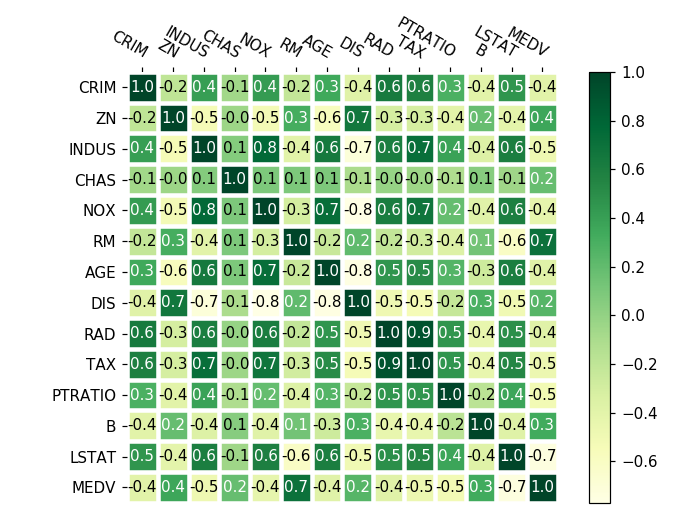

/home/rh235/.local/lib/python3.6/site-packages/ipykernel_launcher.py:106: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index


In [90]:
boston_df =  pd.DataFrame(boston.data, columns = boston.feature_names)
# Concatenamos el target
boston_df['MEDV'] = boston.target

# Obtenemos matriz de correlación
correlation = boston_df.corr().round(2)

fig, ax = plt.subplots()

# Hacemos un mapa de calor para identificar los atributos con mayor coeficiente de determinacion
im, cbar = heatmap(correlation.values, boston_df.columns, boston_df.columns, ax=ax,
                   cmap="YlGn")
texts = annotate_heatmap(im, valfmt="{x:.1f}")

fig.tight_layout()
plt.show()


In [67]:
# Extramos los dos features con mayor correlacion

data = np.c_[boston_df['RM'].values, boston_df['LSTAT'].values]

In [80]:
X = data 
Y = boston_df['MEDV'].values

In [ ]:
# Creamos el modelos y lo entrenamos
modelo = LinearRegression()


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

modelo.fit(X_train, Y_train)

y_gorro = modelo.predict(X_test)

In [89]:
# Obtenemos el MSE (Error cuadratico medio)

precision = mse(Y_test, y_gorro)

print(precision)

26.39288682266608


In [ ]:
# Función para aplicar el modelo a cada par de filas de la cuadricula

def f(x, y):
    z = []
    for a,b in zip(x,y):
        alfa = modelo.predict(np.c_[b,a])
        z.append(alfa)
    return np.array(z)

<IPython.core.display.Javascript object>


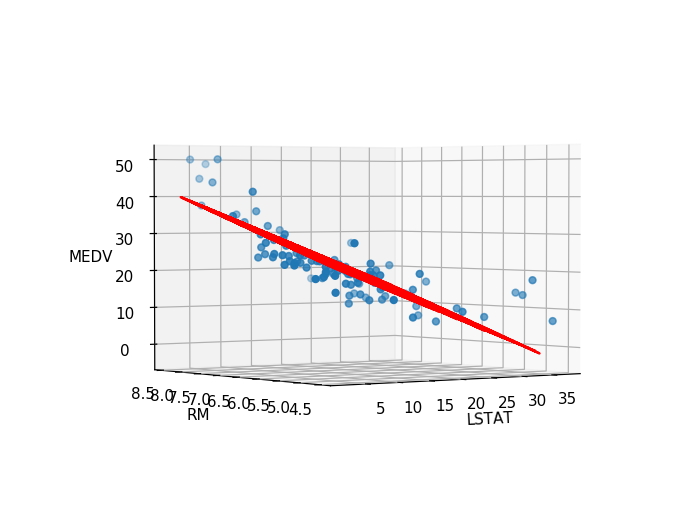

In [173]:
fig = plt.figure()
ax = plt.axes(projection='3d')

# Diagrama de dispersion es 3D
ax.scatter(X_test[:,1], X_test[:,0], Y_test)

# Para realizar una superficie en 3D se debe crear una cuadricula 
xx, yy = np.meshgrid(X_test[:,1], X_test[:,0])

z = f(xx, yy)

ax.plot_wireframe(xx, yy, z, color = 'r')

ax.set_xlabel('LSTAT')
ax.set_ylabel('RM')
ax.set_zlabel('MEDV')

# ax.legend(['predicho', 'real'])

plt.show()

In [174]:
# Coeficientes de la regresion
modelo.coef_

array([ 4.58938833, -0.71722954])

In [175]:
# Ordenada al origen
modelo.intercept_

2.7362403426065995